In [1]:
%matplotlib inline
from marketdata import *
from model import *
from analytics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Load data 

Try clean up markets with 100% close out values

In [2]:
list_of_markets=get_market_list()

In [3]:
df=pd.DataFrame()
for m in list_of_markets:
    try:
        df[m]=get_timeseries(m)
    except:
        print m

RU
S


In [6]:
def remove_inf(pnl):
    return pnl.replace(np.inf,0).replace(-np.inf,0)

In [4]:
mkts=df.T[df.count().sort_values()!=0].index

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [7]:
pos=tsmom_daily(df[mkts],30)
pnl=calc_pnl(pos,df[mkts])
scaling_factor=calc_scaling_factor(pnl)
portfolio= remove_inf(pnl).mean(axis=1).dropna()*scaling_factor

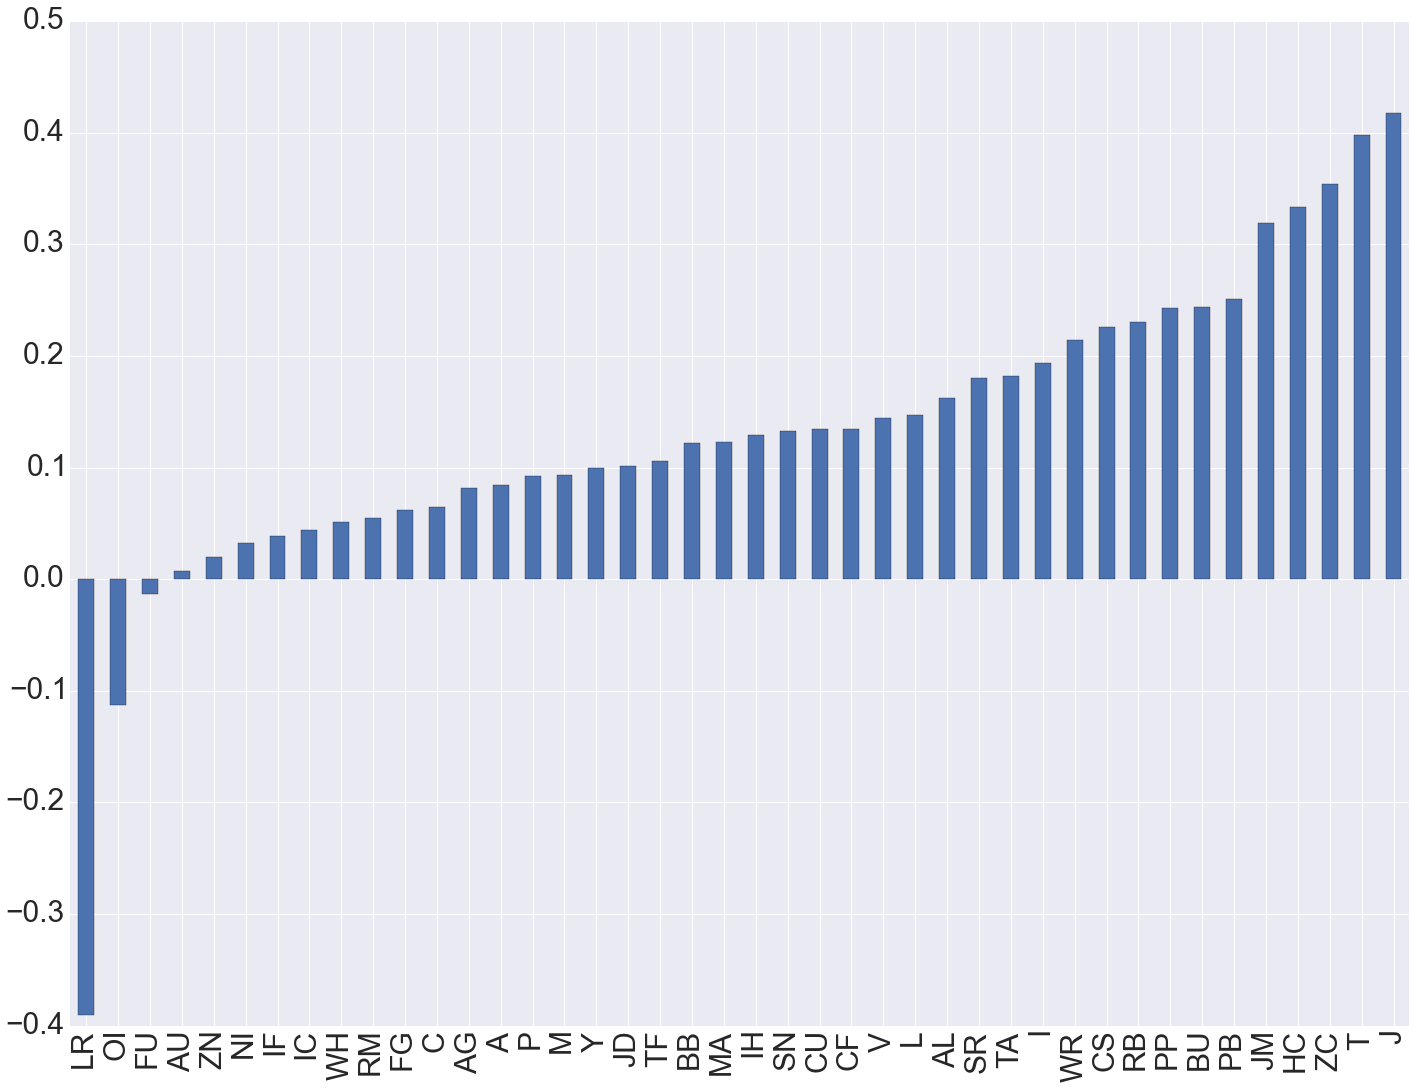

In [8]:
calc_Sharpe(pnl).dropna().sort_values().plot(kind='bar')

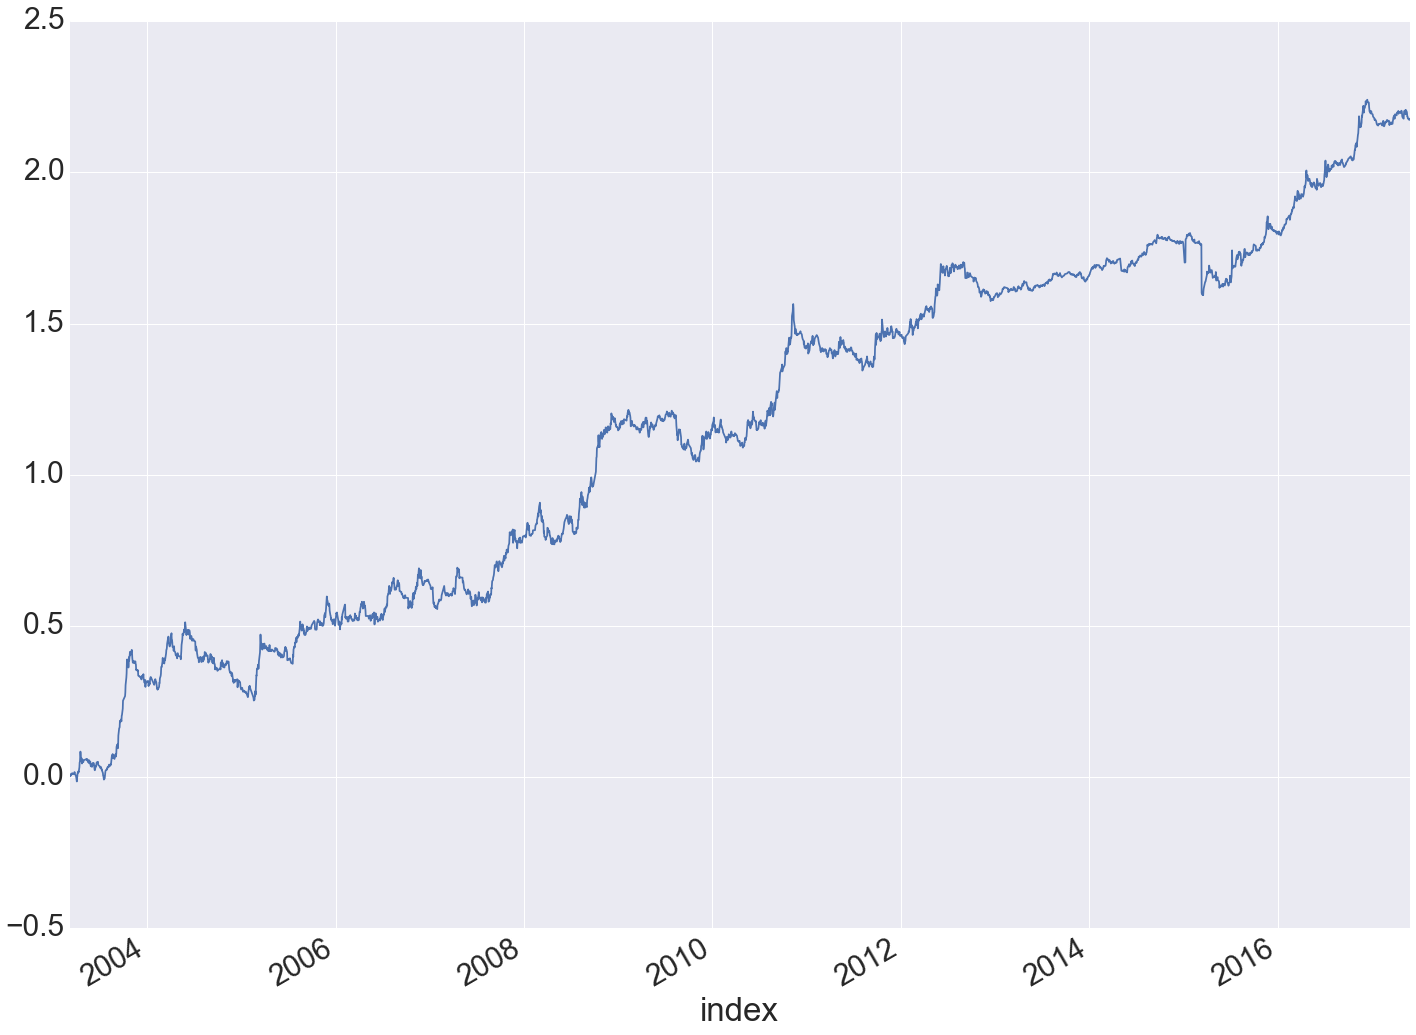

In [9]:
portfolio.cumsum().plot()